# Multi-class Weather Classification using Alexnet

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
path = r'C:\Users\HP\Downloads\imgdataset\Multi-class Weather Dataset\train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 1425 images belonging to 5 classes.


In [7]:
d = train.class_indices
d

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3, 'foggy': 4}

In [8]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 5)
Image Size of first image :  (227, 227, 3)
Output of first image :  (5,)


C:\Users\HP\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 1.]')

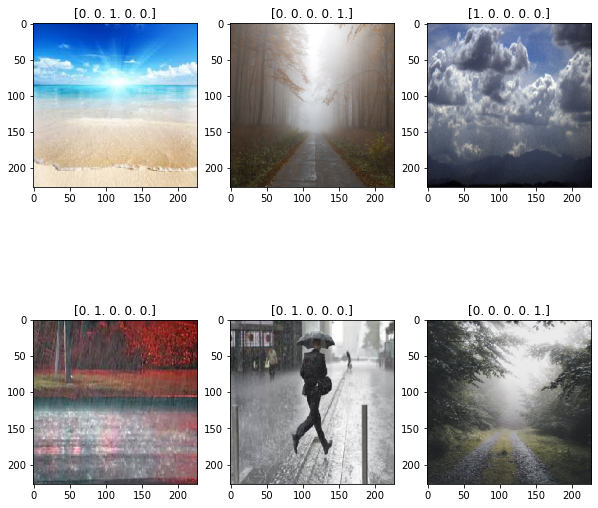

In [9]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [10]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(5,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(10,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(15, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(20, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(25, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(40, activation = 'relu', name = "fc0")(X)
    
    X = Dense(40, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(5,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [11]:
alex = AlexNet(train[0][0].shape[1:])

In [12]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 5)         1820      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 5)         20        
_________________________________________________________________
activation (Activation)      (None, 55, 55, 5)         0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 5)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 10)        1260      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 10)        40  

In [13]:
alex.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [14]:
alex.fit_generator(train,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
45/45 [==============================] - 57s 1s/step - loss: 1.1730 - accuracy: 0.5467
Epoch 2/20
45/45 [==============================] - 66s 1s/step - loss: 0.7386 - accuracy: 0.7179
Epoch 3/20
45/45 [==============================] - 61s 1s/step - loss: 0.6464 - accuracy: 0.7712
Epoch 4/20
45/45 [==============================] - 66s 1s/step - loss: 0.5631 - accuracy: 0.7944
Epoch 5/20
45/45 [==============================] - 73s 2s/step - loss: 0.5140 - accuracy: 0.8147
Epoch 6/20
45/45 [==============================] - 112s 2s/step - loss: 0.4985 - accuracy: 0.8204
Epoch 7/20
45/45 [==============================] - 78s 2s/step - loss: 0.4302 - accuracy: 0.8484
Epoch 8/20
45/45 [==============================] - 83s 2s/step - loss: 0.3719 - accuracy: 0.8709
Epoch 9/20
45/45 [==============================] - 64s 1s/step - loss: 0.3762 - accuracy: 0.8681
Epoch 10/20
45/45 [======================

In [15]:
path_test = r'C:\Users\HP\Downloads\imgdataset\Multi-class Weather Dataset\validation'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 1425 images belonging to 5 classes.


In [16]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss = 0.5001838803291321
Test Accuracy = 0.8189473748207092


In [17]:
path_test = r'C:\Users\HP\Downloads\imgdataset\Multi-class Weather Dataset\validation'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 1425 images belonging to 5 classes.


In [18]:
predictions = alex.predict_generator(predict)

Instructions for updating:
Please use Model.predict, which supports generators.


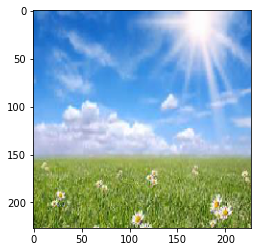

In [19]:
imshow(predict[700][0][0])

In [20]:
print(predictions[700])

[1.14839226e-01 6.40968420e-03 8.18301924e-05 9.99560463e-04
 8.77669692e-01]


In [38]:
batch_size = 10
Y_pred = alex.predict_generator(test, 1400 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix')
cm = confusion_matrix(test.classes, y_pred)
print(cm)
print('Classification Report')
print(classification_report(test.classes, y_pred))

Confusion Matrix
[[92 16 34 77 81]
 [74 13 27 53 48]
 [74 15 35 72 57]
 [99 20 59 93 86]
 [86 23 44 80 67]]
Classification Report
              precision    recall  f1-score   support

           0       0.22      0.31      0.25       300
           1       0.15      0.06      0.09       215
           2       0.18      0.14      0.15       253
           3       0.25      0.26      0.25       357
           4       0.20      0.22      0.21       300

    accuracy                           0.21      1425
   macro avg       0.20      0.20      0.19      1425
weighted avg       0.20      0.21      0.20      1425



In [21]:
# save it as a h5 file
import tensorflow as tf
from tensorflow.keras.models import load_model

# save model architecture
model_json = alex.to_json()
with open('alexnet_model.json', 'w',encoding='utf8') as json_file:
    json_file.write(model_json)

# save model's learned weights
alex.save_weights('model_alexnet.hdf5', overwrite=True)